In [1]:
import h3

import geopandas
import contextily as cx
import matplotlib.pyplot as plt#import geodatasets
import shapely.geometry



def plot_df(df, column=None, ax=None):
    "Plot based on the `geometry` column of a GeoPandas dataframe"
    df = df.copy()
    df = df.to_crs(epsg=3857)  # web mercator

    if ax is None:
        _, ax = plt.subplots(figsize=(8,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    df.plot(
        ax=ax,
        alpha=0.5, edgecolor='k',
        column=column, categorical=True,
        legend=True, legend_kwds={'loc': 'upper left'},
    )
    cx.add_basemap(ax, crs=df.crs, source=cx.providers.CartoDB.Positron)


def plot_shape(shape, ax=None):
    df = geopandas.GeoDataFrame({'geometry': [shape]}, crs='EPSG:4326')
    plot_df(df, ax=ax)


def plot_cells(cells, ax=None):
    shape = h3.cells_to_h3shape(cells)
    plot_shape(shape, ax=ax)


def plot_shape_and_cells(shape, res=9):
    fig, axs = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
    plot_shape(shape, ax=axs[0])
    plot_cells(h3.h3shape_to_cells(shape, res), ax=axs[1])
    fig.tight_layout()

  name         gb                                           geometry
0  云南省  156530000  POLYGON ((99.11815 29.19243, 99.10934 29.16576...


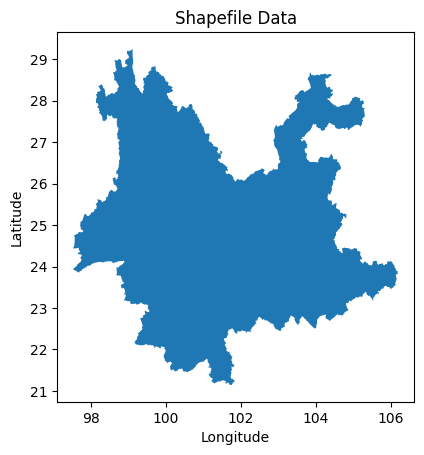

In [5]:

#shp必须与shx同处于一个文件夹内
#数据来源：https://github.com/GaryBikini/ChinaAdminDivisonSHP
shapefile_path = './shape/YN.shp'
gdf = geopandas.read_file(shapefile_path)

print(gdf.head())

gdf.plot()
plt.title('Shapefile Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

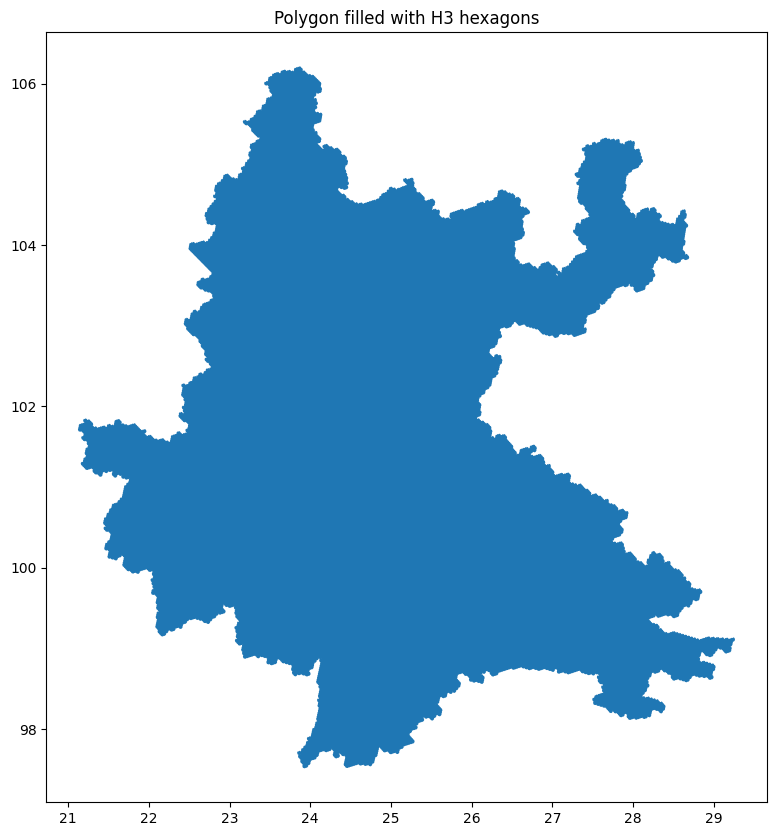

In [6]:
df = gdf.to_crs(epsg=4326)
geo = df.geometry[0]
yncells = h3.geo_to_cells(geo, res=7)
gdf = geopandas.GeoDataFrame(geometry=[shapely.geometry.Polygon(h3.cell_to_boundary(h)) for h in yncells])
fig, ax =plt.subplots(figsize=(10, 10))
gdf.boundary.plot(ax=ax)
gdf.plot(ax=ax, facecolor='lightgrey')# set title
plt.title('Polygon filled with H3 hexagons')
plt.show()

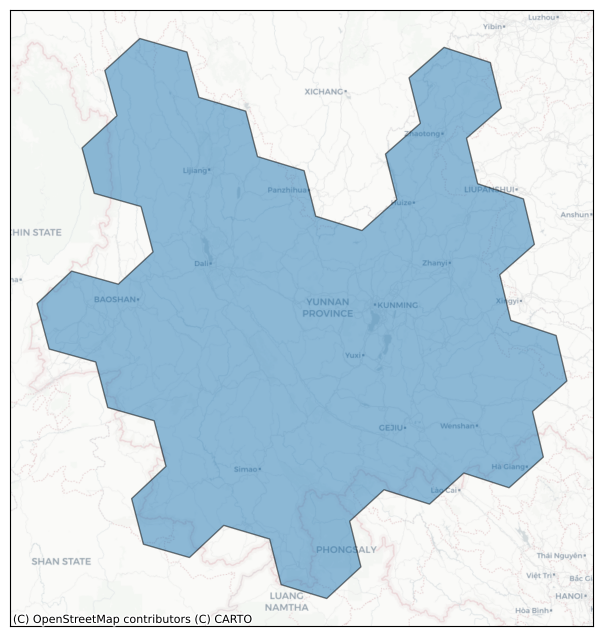

In [28]:
plot_cells(h3.geo_to_cells(geo, res=3))

In [15]:
cell_column = df.geometry.apply(lambda x: h3.geo_to_cells(x, res=6))

In [16]:
shape_column = cell_column.apply(h3.cells_to_h3shape)
shape_column

0    <LatLngPoly: [1752]>
Name: geometry, dtype: object

In [17]:
df.geometry = shape_column
type(df.geometry[0])


shapely.geometry.polygon.Polygon

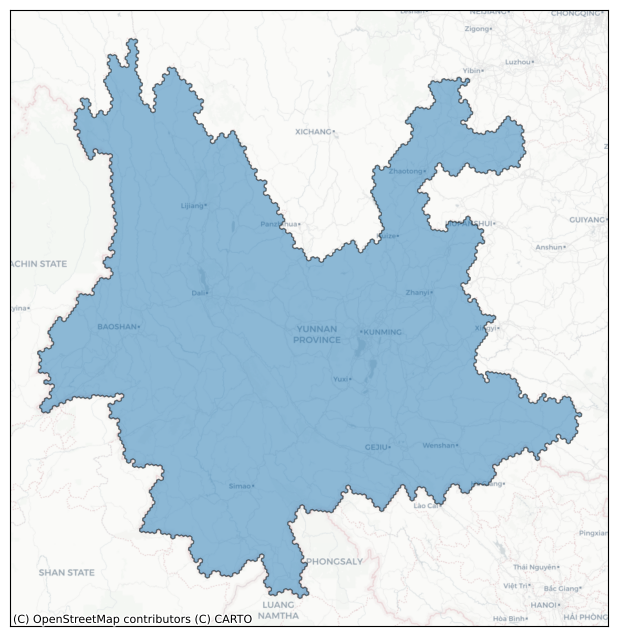

In [18]:
plot_df(df)

In [19]:
df.to_file('123.shp', driver='ESRI Shapefile')